In [34]:
from numpy import *
import operator
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import *
import numpy as np


In [ ]:
def kernel(point, xmat, k):
    m, n = shape(xmat)
    weights = mat(eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = exp(diff * diff.T / (-2.0 * k ** 2))
    return weights

In [ ]:
def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k)
    W = (X.T * (wei * X)).I * (X.T * (wei * ymat.T))
    return W

In [ ]:
def localWeightRegression(xmat, ymat, k):
    m, n = shape(xmat)
    ypred = zeros(m)
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
    return ypred

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

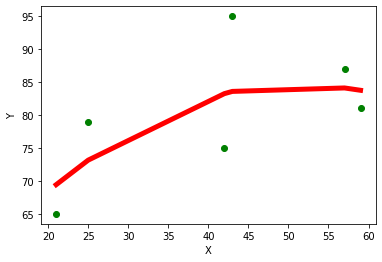

In [21]:
data = pd.read_csv("/content/drive/MyDrive/dataset.csv")
x=array(data.X)
y=array(data.Y)
mx=mat(x)
my=mat(y)
m=shape(mx)[1]
one = mat(ones(m))
X=hstack((one.T,mx.T))

# set k here
ypred = localWeightRegression(X, my, 10)
SortIndex = X[:, 1].argsort(0)
xsort = X[SortIndex][:, 0]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x,y, color="green")
ax.plot(xsort[:, 1], ypred[SortIndex], color="red", linewidth=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [38]:
print("Predicted Value of Y for X=55 ",ypred)

Predicted Value of Y for X=55  [83.59269122 69.43657263 73.16306393 83.25514325 84.11634718 83.76250129]
